In [69]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from pandas import DataFrame
import pandas as pd
import seaborn as sns
import numpy as np
import json
import os

path = './result/compare2/'
userlist = ['s002','s032','s036','s047','s052']
#userlist = ['s002','s032']
start_line_list = [0,50,100,150,200,250,300,350]
decay_rate = 0.005
filename_list = ['0']*len(userlist)

def filename(user,start_line,end_line,decay_rate):
    return path + user + '_'+str(start_line) + '_' + str(end_line) + 'decay'+str(decay_rate)+'.json'

def open_json(param_filename):
    if not os.path.exists(param_filename):
        raise FileNotFoundError(
            'Input file `{:s}` not found.'.format(param_filename))
    with open(param_filename, 'r') as param_file:
        param_dict = json.load(param_file)
    return param_dict

data_list = []
columns1 = []
columns2 = ['user', 'session']

for i,user in enumerate(userlist):
    for j,start_line in enumerate(start_line_list):
        param_filename = filename(user,start_line,start_line+50,decay_rate)
        data_file = open_json(param_filename)
        
        adjacency = data_file['vi_exp']['adjacency']
        #mu = data_file['vi_exp']['mu']
        #vector = np.concatenate((adjacency,mu))
        vector = np.clip(adjacency, 1.0e-06, 10)
        #print(vector)
        vector = np.append(vector,user)
        vector = np.append(vector,str(start_line/50+1))

        #print(vector)
        #print(user)
        data_list.append(vector)

for i in range(len(adjacency)):
    columns1.append('adj'+str(i))
'''
for j in range(len(mu)):
    columns1.append('mu'+str(j))
'''

df = pd.DataFrame(data_list)
df.columns = columns1 + columns2

#print (df_oral) 
###################################PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder,LabelEncoder

le = LabelEncoder()
df['target'] = le.fit_transform(df['user'])
df.drop(['user'], axis=1, inplace=True)

X = df.drop(['target','session'], axis=1)
y = df['target'].values

'''
scaler = StandardScaler()      #对X的列进行标准化
X_scaled = scaler.fit_transform(X)
'''
X_scaled = X

pca = PCA(random_state=17)
pca.fit(X_scaled)
pca_result = pca.transform(X_scaled)

#pca_result.shape



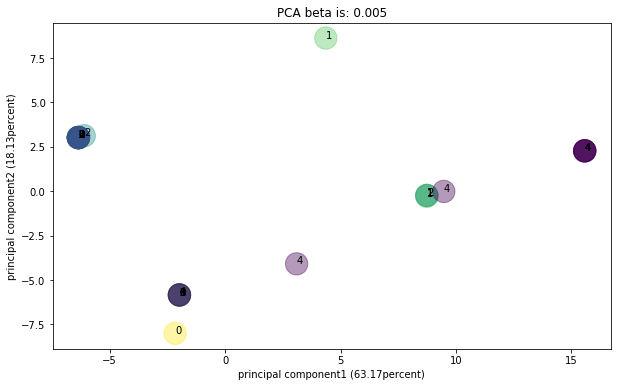

In [70]:
ratio = pca.explained_variance_ratio_
ratio1 = round(ratio[0]*100, 2) 
ratio2 = round(ratio[1]*100, 2)  

fig,ax=plt.subplots(figsize=(10,6))
#plt.figure(figsize=(8,6))
#全部数据
#plt.scatter(pca_result[:,0], pca_result[:,1], c=df['target'], s=2, cmap='viridis_r', alpha=0.4)
#取前10个用户
#plt.scatter(pca_result[:,0], pca_result[:,1], c=df['target'][0:4000], s=2, cmap='viridis_r', alpha=0.4)
#取前5个用户
#plt.scatter(pca_result[:,0], pca_result[:,1], c=df['target'], s=100, cmap='viridis_r', alpha=0.4)
ax.scatter(pca_result[:,0], pca_result[:,1], c=df['target'], s=500, cmap='viridis_r', alpha=0.4)

for i,txt in enumerate(y):
 ax.annotate(txt,(pca_result[i,0],pca_result[i,1]))

plt.xlabel('principal component1 ('+str(ratio1)+'percent)')
plt.ylabel('principal component2 ('+str(ratio2)+'percent)')
plt.title('PCA beta is: '+str(decay_rate))

plt.show()

Text(0.5, 1.0, 'PCA pricipal component nums for data infromantion (beta is: 0.005)')

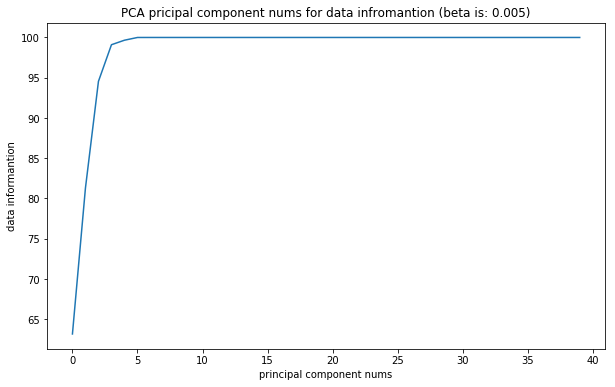

In [71]:
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('principal component nums')
plt.ylabel('data informantion')
plt.title('PCA pricipal component nums for data infromantion ('+'beta is: '+str(decay_rate) +')')

T-SNE

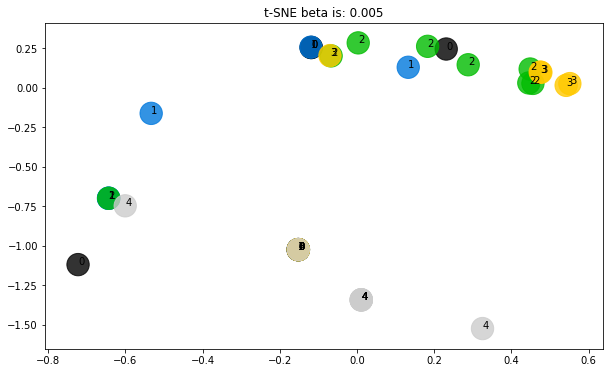

In [72]:
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=1, n_components=3, random_state=17)
tsne_representation = tsne.fit_transform(X_scaled, y=df['target'])

fig,ax=plt.subplots(figsize=(10,6))
ax.scatter(tsne_representation[:,0], tsne_representation[:,1], c=df['target'], s=500, cmap='nipy_spectral', alpha=.8)

for i,txt in enumerate(y):
 ax.annotate(txt,(tsne_representation[i,0],tsne_representation[i,1]))

plt.title('t-SNE beta is: '+str(decay_rate))

plt.show()


In [73]:
print(ratio)

[6.31689999e-01 1.81269553e-01 1.32546492e-01 4.54789033e-02
 5.60039561e-03 3.39556013e-03 1.90857796e-05 4.73053570e-09
 3.82750121e-09 8.14981293e-10 6.62310938e-10 5.74416186e-10
 2.07264910e-10 1.55642179e-10 6.14932576e-11 4.00602078e-11
 2.49286535e-11 1.95464943e-11 1.91036861e-11 1.20248644e-11
 1.01799262e-11 9.60994342e-12 9.14805737e-12 6.64500347e-12
 5.17610448e-12 4.68166332e-12 3.65612565e-12 3.12195255e-12
 2.74433828e-12 2.52847822e-12 1.81852940e-12 1.65789736e-12
 1.57260897e-12 1.20660037e-12 9.40573638e-13 9.00913195e-13
 6.83065651e-13 5.77405790e-13 4.28513778e-13 1.93873174e-32]
